In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
cost = pd.read_csv('/Users/pratyush/Python/Python for Finance and Algorithmic Trading/Python-Finance-QuantConnect (1)/06-Financial-Concepts-with-Python/COST.csv', index_col = 'Date', parse_dates = True)['Adj Close']

In [3]:
wmt = pd.read_csv('/Users/pratyush/Python/Python for Finance and Algorithmic Trading/Python-Finance-QuantConnect (1)/06-Financial-Concepts-with-Python/WMT.csv', index_col = 'Date', parse_dates = True)['Adj Close']

In [4]:
tgt = cost = pd.read_csv('/Users/pratyush/Python/Python for Finance and Algorithmic Trading/Python-Finance-QuantConnect (1)/06-Financial-Concepts-with-Python/TGT.csv', index_col = 'Date', parse_dates = True)['Adj Close']

In [5]:
dg = pd.read_csv('/Users/pratyush/Python/Python for Finance and Algorithmic Trading/Python-Finance-QuantConnect (1)/06-Financial-Concepts-with-Python/DG.csv', index_col = 'Date', parse_dates = True)['Adj Close']

In [11]:
retail = pd.concat([cost,wmt,tgt,dg], axis = 1)
retail.columns = ['COST','WMT','TGT','DG']

In [12]:
retail

,COST,WMT,TGT,DG
Date,,,,
2016-09-06,140.896622,65.758080,60.674061,68.342621
2016-09-07,138.739395,64.911324,60.847187,68.105331
2016-09-08,136.805038,64.704163,60.120117,67.080215
2016-09-09,134.335831,63.325943,59.721989,66.994766
2016-09-12,135.218338,64.803238,59.981625,68.366478
...,...,...,...,...
2021-08-27,450.339996,146.520004,249.179993,225.250000
2021-08-30,455.929993,147.699997,249.360001,225.360001
2021-08-31,455.489990,148.100006,246.979996,222.910004


In [13]:
retail_returns = retail.pct_change(1).dropna()

In [14]:
retail_returns

,COST,WMT,TGT,DG
Date,,,,
2016-09-07,-0.015311,-0.012877,0.002853,-0.003472
2016-09-08,-0.013942,-0.003191,-0.011949,-0.015052
2016-09-09,-0.018049,-0.021300,-0.006622,-0.001274
2016-09-12,0.006569,0.023328,0.004347,0.020475
2016-09-13,-0.006263,-0.006672,-0.005195,-0.019368
...,...,...,...,...
2021-08-27,0.002292,-0.005633,0.000884,-0.002877
2021-08-30,0.012413,0.008053,0.000722,0.000488
2021-08-31,-0.000965,0.002708,-0.009544,-0.010871


In [15]:
#Calculate cumulative percent gain

cum_returns = (1 + retail_returns['COST']).cumprod() - 1

In [16]:
cum_returns

Date
2016-09-07   -0.015311
2016-09-08   -0.029040
2016-09-09   -0.046565
2016-09-12   -0.040301
2016-09-13   -0.046311
                ...   
2021-08-27    2.196244
2021-08-30    2.235919
2021-08-31    2.232796
2021-09-01    2.240106
2021-09-02    2.271690
Name: COST, Length: 1257, dtype: float64

In [17]:
cum_percent_returns = cum_returns * 100

In [18]:
cum_percent_returns

Date
2016-09-07     -1.531071
2016-09-08     -2.903962
2016-09-09     -4.656457
2016-09-12     -4.030107
2016-09-13     -4.631149
                 ...    
2021-08-27    219.624409
2021-08-30    223.591855
2021-08-31    223.279567
2021-09-01    224.010599
2021-09-02    227.168952
Name: COST, Length: 1257, dtype: float64

In [19]:
#For dot product of retail returns and 100 weighted capital investment in COSTCO
dot_prod = np.dot([1,0,0,0],retail_returns.transpose())

In [20]:
dot_prod

array([-0.01531071, -0.01394238, -0.01804909, ..., -0.00096507,
        0.0022613 ,  0.00974768])

In [21]:
#For dot product of retail returns with equal weights on all of the securities

n = len(retail_returns.columns)
equal_weight = n * [1/n]

equal_weight_returns = np.dot(equal_weight, retail_returns.transpose())

In [22]:
equal_weight_returns

array([-0.00720156, -0.01103371, -0.01181137, ..., -0.00466819,
       -0.00083906,  0.00573659])

In [23]:
#To convert the equal weight returns into a series

equal_weigthed_returns_series = pd.Series(equal_weight_returns, index = retail_returns.index)

In [24]:
equal_weigthed_returns_series

Date
2016-09-07   -0.007202
2016-09-08   -0.011034
2016-09-09   -0.011811
2016-09-12    0.013680
2016-09-13   -0.009374
                ...   
2021-08-27   -0.001334
2021-08-30    0.005419
2021-08-31   -0.004668
2021-09-01   -0.000839
2021-09-02    0.005737
Length: 1257, dtype: float64

# MONTE CARLO SIMULATION

In [25]:
#First we calculate log returns of the retail data

retail

,COST,WMT,TGT,DG
Date,,,,
2016-09-06,140.896622,65.758080,60.674061,68.342621
2016-09-07,138.739395,64.911324,60.847187,68.105331
2016-09-08,136.805038,64.704163,60.120117,67.080215
2016-09-09,134.335831,63.325943,59.721989,66.994766
2016-09-12,135.218338,64.803238,59.981625,68.366478
...,...,...,...,...
2021-08-27,450.339996,146.520004,249.179993,225.250000
2021-08-30,455.929993,147.699997,249.360001,225.360001
2021-08-31,455.489990,148.100006,246.979996,222.910004


In [26]:
retail / retail.shift(1)  #==> Calculates the percent holding remaining

#for eg: 0.984689 means that 98.4689% is held from the previous day

,COST,WMT,TGT,DG
Date,,,,
2016-09-06,NaN,NaN,NaN,NaN
2016-09-07,0.984689,0.987123,1.002853,0.996528
2016-09-08,0.986058,0.996809,0.988051,0.984948
2016-09-09,0.981951,0.978700,0.993378,0.998726
2016-09-12,1.006569,1.023328,1.004347,1.020475
...,...,...,...,...
2021-08-27,1.002292,0.994367,1.000884,0.997123
2021-08-30,1.012413,1.008053,1.000722,1.000488
2021-08-31,0.999035,1.002708,0.990456,0.989129


In [27]:
retail_log_returns = np.log(retail / retail.shift(1))

In [28]:
retail_log_returns

,COST,WMT,TGT,DG
Date,,,,
2016-09-06,NaN,NaN,NaN,NaN
2016-09-07,-0.015429,-0.012960,0.002849,-0.003478
2016-09-08,-0.014040,-0.003197,-0.012021,-0.015166
2016-09-09,-0.018214,-0.021530,-0.006644,-0.001275
2016-09-12,0.006548,0.023060,0.004338,0.020268
...,...,...,...,...
2021-08-27,0.002290,-0.005649,0.000883,-0.002882
2021-08-30,0.012336,0.008021,0.000722,0.000488
2021-08-31,-0.000966,0.002705,-0.009590,-0.010931


In [58]:
#Now to generate randomized weights for the investment in portfolio

N = len(retail.columns)

weights = np.random.rand(N)

#Now to make sure that all of the weights add up to 1, divide them by the sum of all weights
weights / np.sum(weights)

array([0.57168841, 0.08223443, 0.21693941, 0.12913776])

In [59]:
def generate_weights(N):
    weights = np.random.rand(N)
    return weights/np.sum(weights)

In [60]:
generate_weights(4)

array([0.13944796, 0.19955116, 0.31207065, 0.34893023])

In [46]:
np.sum(retail_log_returns.mean() * weights) * 252

0.22401972058311798

In [62]:
#To calculate returns to our portfolio

def calculate_returns(weights, retail_log_returns):
    return np.sum(retail_log_returns.mean() * weights) * 252  #252 to calculate annually
    

In [63]:
calculate_returns(weights, log_returns)

0.2955779124464211

In [48]:
#To calculate portfolio volatility (variance)
    #Do this using a covariance matrix
    
log_returns_cov = retail_log_returns.cov()

In [49]:
def calculate_volatility(weights,retail_log_returns_cov):
    
    #Since we are going to calculate sharpe ratio later, we need to get an annualized covariance matrix
    
    annualized_cov = np.dot(log_returns_cov * 252, weights)
    
    vol = np.dot(weights.transpose(), annualized_cov)
    
    return np.sqrt(vol)

In [50]:
calculate_volatility(weights, retail_log_returns.cov())

0.18855702401346455

In [51]:
#Now for the Monte Carlo Simulation

log_returns = np.log(retail / retail.shift(1))
log_returns_cov = retail_log_returns.cov()

In [52]:
mc_portfolio_returns = []
mc_portfolio_volatility = []
mc_weights = []

for sim in range(3000):
    
    weights = generate_weights(N = 4)
    mc_weights.append(weights)
    # mc = monte carlo
    
    sim_returns = calculate_returns(weights, log_returns)
    mc_portfolio_returns.append(sim_returns)
    
    sim_volatility = calculate_volatility(weights, log_returns_cov)
    mc_portfolio_volatility.append(sim_volatility)

In [53]:
mc_sharpe_ratios = np.array(mc_portfolio_returns)/np.array(mc_portfolio_volatility)

In [54]:
from importlib import reload
plt=reload(plt)

Text(0, 0.5, 'RETURNS')

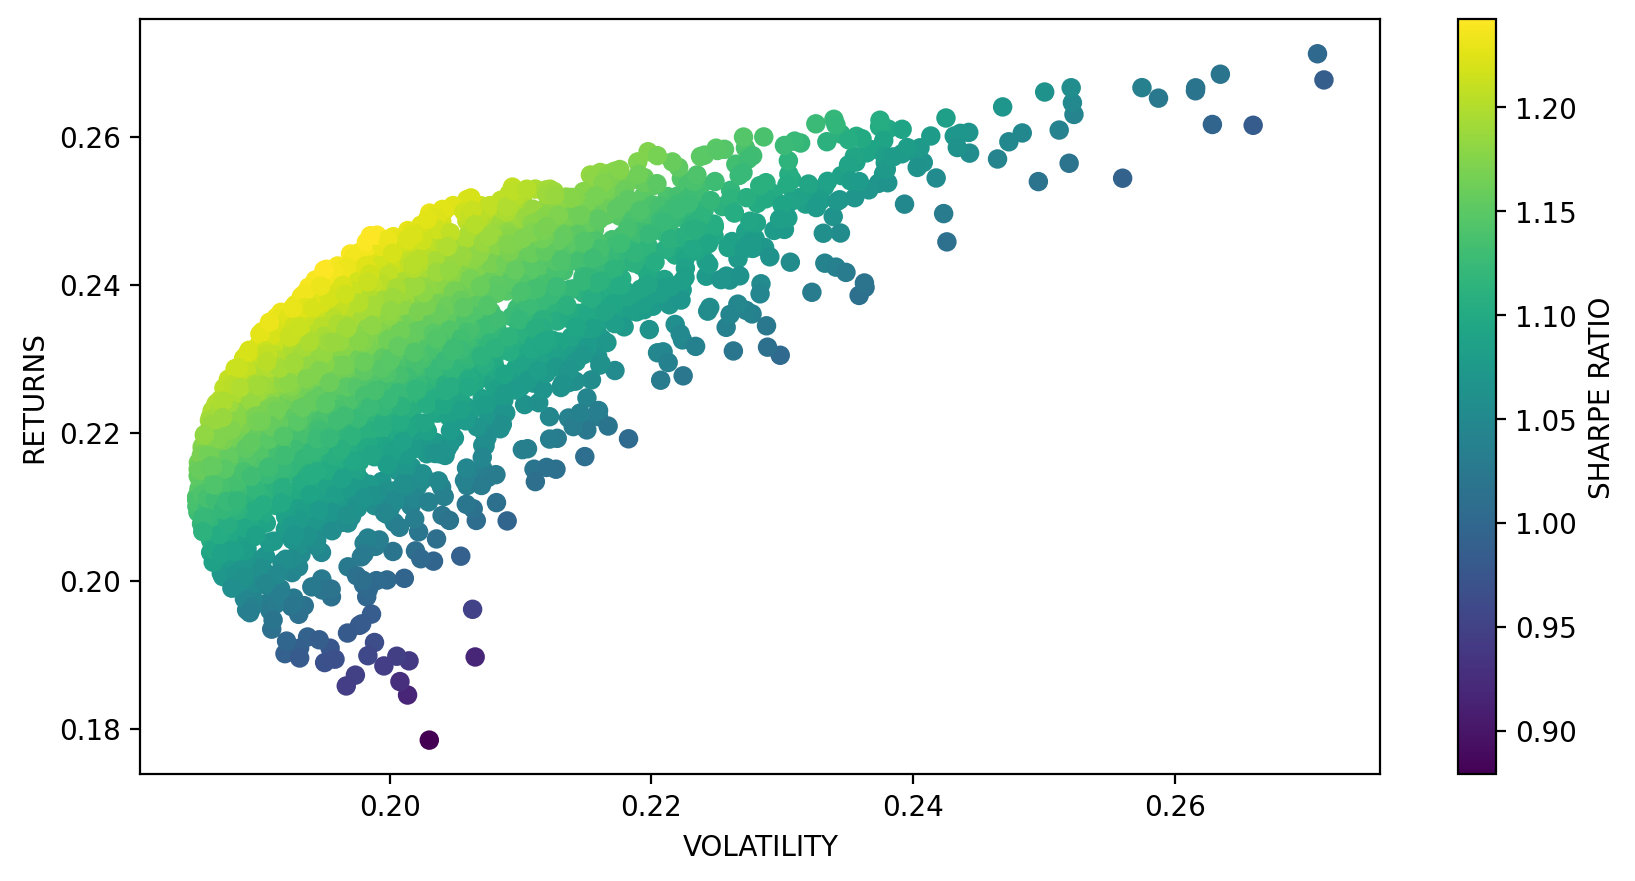

In [55]:
plt.figure(dpi = 200, figsize = (10,5))
plt.scatter(mc_portfolio_volatility, mc_portfolio_returns, c = mc_sharpe_ratios)

plt.colorbar(label = 'SHARPE RATIO')
plt.xlabel('VOLATILITY')
plt.ylabel('RETURNS')


In [56]:
#To find out the highest sharpe ratio

np.argmax(mc_sharpe_ratios)

2930

In [57]:
mc_weights[1369] #This is the ideal set of weights to invest in

array([0.41511987, 0.35702931, 0.06324292, 0.16460789])